## Practice Final Exam, ChE 263

This exam covers the following topics:

* Problem 1: Variable types and formats
* Problem 2: Debugging
* Problem 3: Solve Linear Equations
* Problem 4: Differentiate and Integrate
* Problem 5: Interpolation
* Problem 6: General Nonlinear Regression and Plotting
* Problem 7: Equation Solution and Plotting
* Problem 8: Parameter Estimation
* Problem 9: Implicit Equation Solve

A template for each problem is provided with instructions on what is needed. In some cases, the problem is to debug a section of code to produce a specific result. In other cases, the problem is to import a module and produce a result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: Variable types and formats

#### Part A
Add **x=2.0** (float) and **y='3'** (string) together to produce a number 5 (integer). Show the type of variable with **type()** to confirm that the result is an integer.

Hint: A string is converted to a number with **int()** or **float()**.

In [2]:
x = 2.0
y = '3'

# add two integers together (5)
z = int(x) + int(y)
# show the result of adding
print(z)
# show that z is an integer
print(type(z))

5
<class 'int'>


#### Part B

Show $\pi$ to 30 decimal places.

In [3]:
print('pi = {:.30f}'.format(np.pi))

pi = 3.141592653589793115997963468544


## Problem 2: Debugging

You are working on the launch sequence of a rocket. The following code is intended to count backwards from 5 to 0 with steps of -1 in 1 second intervals. Print `blast off` after reaching zero.

```python
import time
for i in range(5,1)
    time.wait(1.0)
    print(i)
print('Blast off")
```

The code has a few bugs (errors) that prevent it from running or producing the correct result. Find the errors in the code to produce:

```
5
4
3
2
1
0
Blast off
```

In [4]:
# corrected code
import time
for i in range(5,1,-1):
    time.sleep(1.0)
    print(i)
print('Blast off')

5
4
3
2
Blast off


## Problem 3: Solve Linear Equations

Find the values of $x_0$, $x_1$ that satisfy the following equations:

$5 x_0 + x_1 = 2$

$3 x_0 + 12 x_1 = 1$

Put equations into matrix form with $A \;x = b$ and solve $x = A^{-1}\; b$. The $A$ matrix is given below.

In [5]:
A = np.array([[5,1],[3,12]])
b = np.array([2,1])

x = np.linalg.solve(A,b)
print(x)

[ 0.40350877 -0.01754386]


## Problem 4: Differentiate and Integrate

#### Part A

Compute the derivative $\frac{d f(x)}{dx}$ for the following function:

$f(x) = \frac{1}{1+e^{-x}}$

Find a solution with scipy (numerically) and sympy (symbolically). For the numeric solution (scipy), use value of $x=0.2$.

In [6]:
# numeric method
from scipy.misc import derivative
def f(x):
    return 1.0/(1.0+np.exp(-x))
print(derivative(f,0.2))

0.229249632313315


In [14]:
# analytic solution with sympy
import sympy as sym
x = sym.Symbol('x')
dx = sym.diff(1/(1+sym.exp(-x)),x)
dx

exp(-x)/(1 + exp(-x))**2

#### Part B

Compute the integral for the function:

$f(x) = \frac{1}{1+e^{-x}}$

Find a solution with scipy (numerically) and sympy (symbolically). For the numeric solution, use limits of integration for $x$ between $-1$ and $1$:

$\int_{-1}^{1} \left(\frac{1}{1+e^{-x}}\right) dx$

In [8]:
# Solution 1: Numeric
from scipy.integrate import quad
def f(x):
    return (1.0/(1.0+np.exp(-x)))
result = quad(f,-1,1)[0]
print(result)

1.0


x + log(1 + exp(-x))

In [13]:
# Solution 2: Symbolic
import sympy as sym
x = sym.Symbol('x')
fs = 1/(1+sym.exp(-x))
result = sym.integrate(fs)
result

x + log(1 + exp(-x))

## Problem 5: Interpolation

Data for `x` and `y` is shown below:

```python
x = [1,3,7,10]
y = [2,9,20,35]
```

Create a cubic spline interpolation to approximate the value of `y` at `x=5`. Show a cubic spline interpolation on a plot together with the data points. Label the plot with appropriate $x$ and $y$ axis labels, and a legend. Save the plot as `plot.png`.

14.20634920634921


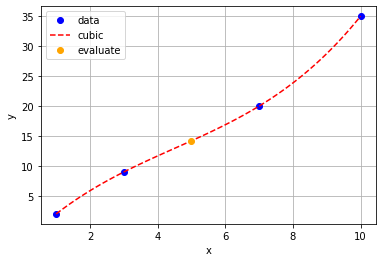

In [27]:
from scipy.interpolate import interp1d
x = np.array([1,3,7,10])
y = np.array([2,9,20,35])
plt.plot(x,y,'bo',label='data')

xp = np.linspace(1,10,100)
y1 = interp1d(x,y,kind='cubic')
print(y1(5))
plt.plot(xp,y1(xp),'r--',label='cubic')
plt.plot(5,y1(5),marker='o',linestyle='',color='orange',label='evaluate')
plt.legend(); plt.grid(); plt.xlabel('x'); plt.ylabel('y')
plt.savefig('plot.png',dpi=600)
plt.show()

## Problem 6: Nonlinear Regression and Plotting

Pressure in a tank is recorded as $P = [1.5,2.6,3.5,10.2,20.3,30.2]$ at respective times of $[0,1,2,3,4,5]$ min. Create a nonlinear approximation of the pressure trend as:

$P = A \, e^{n\,t}$

where $t$ is time, $A$ is an unknown pre-exponential factor, and $n$ is also an unknown parameter. Show the optimized parameter values as well as a plot with the data points.

A = 1.8338873466478285
n = 0.5669820526775803


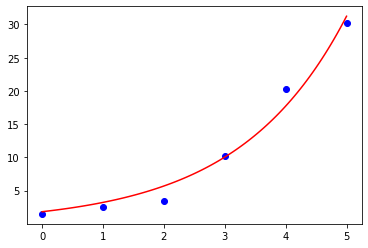

In [10]:
from scipy.optimize import curve_fit

x = np.array([0,1,2,3,4,5])
y = np.array([1.5,2.6,3.5,10.2,20.3,30.2])

# Step 1: define nonlinear function
# Step 2: use curve_fit to optimize the parameters
# Step 3: plot the function with the optimized parameters and data


## Solution
def f(x,A,n):
    return A*np.exp(n*x)

popt, pcov = curve_fit(f,x,y)
A = popt[0]
n = popt[1]
print('A = '+str(A))
print('n = '+str(n))

plt.plot(x,y,'bo')
xp = np.linspace(0,5,100)
plt.plot(xp,f(xp,A,n),'r-')

## Problem 7: Equation Solution and Plotting

#### Part A

The ideal gas law is shown below:

$P V_m=R_g T$

where $P$ is the pressure, $V_m$ is the molar volume, $T$ is the temperature, and $R_g$ is the universal gas constant. Use $R_g=8.314 \frac{J}{mol\,K}$.

Create the function $P(V_m,T)$ such that the pressure ($P$) is a function of molar volume $\left(V_m\right)$ and temperature ($T$). Convert the pressure value from $Pa$ to $bar$.

Use the function and range variables to create a $P$ vs $T$ plot where $T$ ranges from $100K$ to $1200K$ and $V_m$ = 2.24 $\frac{L}{mol}$ = 0.00224 $\frac{m^3}{mol}$ . Include $x$ and $y$ labels on the plot and a legend.

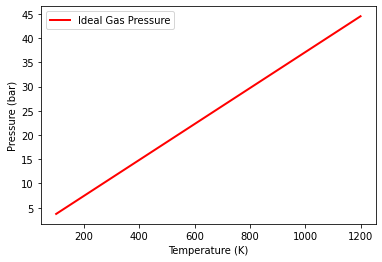

In [60]:
# part A
Rg = 8.314  # J/mol-K
Vm = 0.00224 # m^3/mol

def P(Vm,T):
    # return pressure in bar
    return 1e-5 * Rg * T / Vm
T = np.linspace(100,1200)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(T,P(Vm,T),'r-',linewidth=2,label='Ideal Gas Pressure')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (bar)')
plt.legend()
plt.show()

#### Part B

Repeat part A but use the non-ideal gas Van der Waals Equation of State:

$P+\frac{a}{V_m^2}=\frac{R_g T}{V_m-b}$

with constants $a$ and $b$ for ethanol with critical properties $T_c=514 K$ and $P_c=6.137\mathrm{x}10^6 Pa$:

$a = 25 \frac{\left(R_g T_c\right)^2}{64 P_c} = 25 \frac{\left(8.314 \frac{J}{mol\,K} 514 K\right)^2}{64 \,\mathrm{x}\,6.137\mathrm{x}10^6 Pa}$ = $1.1623 \frac{Pa\,mol^2}{m^6}$

$b = \frac{R_g T_c}{8 P_c} = \frac{8.314 \frac{J}{mol\,K} 514 K}{8 \,\mathrm{x}\,6.137\mathrm{x}10^6 Pa}$ = $8.70416\mathrm{x}10^{-5} \frac{m^3}{mol}$

Compare the ideal gas and non-ideal gas results on the same plot.

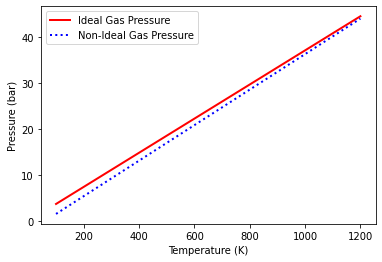

In [61]:
# part B
Rg = 8.314    # J/mol-K
Vm = 0.00224  # m^3/mol
Tc = 514      # K
Pc = 6.137e6  # Pa
a = 25*(Rg*Tc)**2/(64*Pc)
b = Rg*Tc/(8*Pc)

def P2(Vm,T):
    # return pressure in bar
    return 1e-5 * (Rg * T / (Vm-b) - a / Vm**2)

plt.figure()
plt.plot(T,P(Vm,T),'r-',linewidth=2,label='Ideal Gas Pressure')
plt.plot(T,P2(Vm,T),'b:',linewidth=2,label='Non-Ideal Gas Pressure')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (bar)')
plt.legend()
plt.show()

## Problem 8: Parameter Estimation and Statistics

The yield (concentration) of green fluorescent protein produced in a reaction over time has been determined and is shown below.

```
Time (minutes)  Concentration (mg/mL)
15              107.32
30              203.05
45              341.26
60              401.24
180             844.01
480             1135.12
720             1374.70
1200            1651.26
```

Fit the data to the equation 

$G = A t^2 + B\ln{t}+D$

Where $G$ is the concentration of GFP in mg/mL at a given time ($t$) in minutes and $A$, $B$, and $D$ are adjustable parameters to minimize the difference between predicted and measured $G$.

Solve for $A$, $B$, and $D$ to fit the data. Create a plot of the measured and predicted values and determine the $R^2$ value.

A = 0.00018907725436787096
B = 311.39815072936636
D = -815.2247831298712
R^2 = 0.9932723267947231


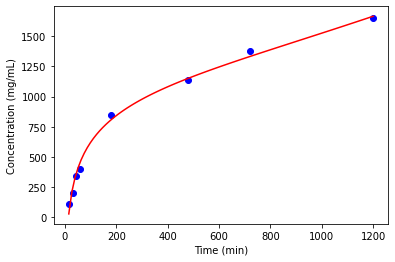

In [66]:
from scipy.optimize import curve_fit

x = np.array([15,30,45,60,180,480,720,1200])
y = np.array([107.32,203.5,341.26,401.24,844.01,1135.12,1374.70,1651.26])

def f(t,A,B,D):
    return A*t**2 + B*np.log(t) + D

popt, pcov = curve_fit(f,x,y)
A = popt[0]
B = popt[1]
D = popt[2]
print('A = '+str(A))
print('B = '+str(B))
print('D = '+str(D))

plt.plot(x,y,'bo')
xp = np.linspace(15,1200,100)
plt.plot(xp,f(xp,A,B,D),'r-')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mg/mL)')

In [67]:
# calculate R^2
from sklearn.metrics import r2_score
rsq2 = r2_score(y, f(x,A,B,D))
print('R^2 = '+str(rsq2))

R^2 = 0.9932723267947231


## 9. Implicit Equation Solve

Determine the two roots of the polynomial using `fsolve` from `scipy.optimize`.

$x^2+3x+2=0$

Verify the solutions from the quadratic formula:

$\frac{-b\pm \sqrt{b^2-4ac}}{2a}$

with solutions:

$x_0=\frac{-3+\sqrt{9-8}}{2} = \frac{-2}{2} = -1$

$x_1=\frac{-3-\sqrt{9-8}}{2} = \frac{-4}{2} = -2$

A better way to find polynomial roots is with `numpy` such as

```python
import numpy as np
np.polynomial.polynomial.polyroots([2,3,1])
```

but use this exercise to practice `fsolve` and how to use a different initial guess to find alternate solutions.

In [63]:
import numpy as np
from scipy.optimize import fsolve

def fcn(x):
    return x**2+3*x+2

In [64]:
z = fsolve(fcn,0)  # guess 0
print(z)

[-1.]


In [65]:
z = fsolve(fcn,-3) # guess -3
print(z)

[-2.]
